In [1]:
# Data reading 
import pandas as pd 

# Array math 
import numpy as np

# Dates 
import datetime

# Ploting 
import matplotlib.pyplot as plt 

# Deep learning
import tensorflow as tf 

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model
from keras.layers import Dense, Dropout
from keras import losses

In [2]:
# Downloading data 
!python3 dataDownload.py

# Creating tidy data
!python3 createTidyData.py

Read municipality data in 0.72 seconds
Rows read: 13912
Read patient data in 2.13 seconds
Rows read: 35911
Data saved in data/2020-11-16


In [3]:
# Reading the data 
d = pd.read_csv('data/tidy_data.csv')

# Sorting by date 
d['day'] = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in d['day']]
d.sort_values('day', inplace=True)

In [4]:
# Saving the last row for prediction 
xtest = d.iloc[-1]

In [5]:
# Extracting the Y column
Y = d['is_covid'].values.tolist()

# Lagging all the data 
d = d.shift(1)
d['Y'] = Y

# Droping the first row 
d = d.drop(0)
d.reset_index(inplace=True, drop=True)

In [6]:
# Defining how many last day data to use in validation 
n_last = 0

# Spliting to training and validation sets 
validation = d.tail(n_last)
train = d[~d.index.isin(validation.index)]

In [7]:
# Creating X and Y matrices for deep learning 
X, Y = train.drop(['day', 'Y'], axis=1), train['Y']
Xval, Yval = validation.drop(['day', 'Y'], axis=1), validation['Y']

In [8]:
print(f'Input dimension: {X.shape}')

Input dimension: (250, 102)


In [9]:
X.tail()

,is_covid,is_cured-0-9Moteris,is_cured-0-9Vyras,is_cured-10-19Moteris,is_cured-10-19Vyras,is_cured-100-109Moteris,is_cured-100-109Vyras,is_cured-120-129Moteris,is_cured-20-29Moteris,is_cured-20-29Vyras,...,is_treated-90-99Vyras,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,tests_total,is_quarantine
245,1433.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12255.0,1.0
246,1559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12294.0,1.0
247,2061.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13983.0,1.0
248,1529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14162.0,1.0
249,1372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8649.0,1.0


In [10]:
Y.tail()

245    1559
246    2061
247    1529
248    1372
249    1151
Name: Y, dtype: int64

In [22]:
# Input shape
inputRegression = Input(shape=(X.shape[1], ))

# Adding one output linear neuron
neuron = Dense(1, activation='linear')(inputRegression)

# Defining the model
model = Model(inputRegression, neuron)

In [23]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 102)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 103       
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Initiating the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compiling the model
model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

# Fitting the model
history = model.fit(X, Y, epochs = 800, batch_size=32, validation_data=(Xval, Yval))

Epoch 1/800
8/8 [==============================] - 0s 4ms/step - loss: 614.9199
Epoch 2/800
8/8 [==============================] - 0s 2ms/step - loss: 611.2204
Epoch 3/800
8/8 [==============================] - 0s 2ms/step - loss: 607.5922
Epoch 4/800
8/8 [==============================] - 0s 2ms/step - loss: 603.9030
Epoch 5/800
8/8 [==============================] - 0s 2ms/step - loss: 600.2063
Epoch 6/800
8/8 [==============================] - 0s 2ms/step - loss: 596.5674
Epoch 7/800
8/8 [==============================] - 0s 2ms/step - loss: 592.8514
Epoch 8/800
8/8 [==============================] - 0s 2ms/step - loss: 589.1898
Epoch 9/800
8/8 [==============================] - 0s 2ms/step - loss: 585.4550
Epoch 10/800
8/8 [==============================] - 0s 2ms/step - loss: 581.8636
Epoch 11/800
8/8 [==============================] - 0s 2ms/step - loss: 578.1527
Epoch 12/800
8/8 [==============================] - 0s 2ms/step - loss: 574.4199
Epoch 13/800
8/8 [===================

8/8 [==============================] - 0s 2ms/step - loss: 243.2070
Epoch 103/800
8/8 [==============================] - 0s 2ms/step - loss: 239.5037
Epoch 104/800
8/8 [==============================] - 0s 2ms/step - loss: 235.9173
Epoch 105/800
8/8 [==============================] - 0s 2ms/step - loss: 232.1475
Epoch 106/800
8/8 [==============================] - 0s 2ms/step - loss: 228.4825
Epoch 107/800
8/8 [==============================] - 0s 2ms/step - loss: 224.8525
Epoch 108/800
8/8 [==============================] - 0s 2ms/step - loss: 221.1797
Epoch 109/800
8/8 [==============================] - 0s 2ms/step - loss: 217.4734
Epoch 110/800
8/8 [==============================] - 0s 2ms/step - loss: 213.8116
Epoch 111/800
8/8 [==============================] - 0s 2ms/step - loss: 210.1322
Epoch 112/800
8/8 [==============================] - 0s 2ms/step - loss: 206.5427
Epoch 113/800
8/8 [==============================] - 0s 2ms/step - loss: 202.7126
Epoch 114/800
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 104.7896
Epoch 203/800
8/8 [==============================] - 0s 2ms/step - loss: 104.6305
Epoch 204/800
8/8 [==============================] - 0s 2ms/step - loss: 104.4549
Epoch 205/800
8/8 [==============================] - 0s 2ms/step - loss: 104.2833
Epoch 206/800
8/8 [==============================] - 0s 2ms/step - loss: 104.1191
Epoch 207/800
8/8 [==============================] - 0s 2ms/step - loss: 103.9422
Epoch 208/800
8/8 [==============================] - 0s 2ms/step - loss: 103.7811
Epoch 209/800
8/8 [==============================] - 0s 2ms/step - loss: 103.5996
Epoch 210/800
8/8 [==============================] - 0s 2ms/step - loss: 103.4420
Epoch 211/800
8/8 [==============================] - 0s 2ms/step - loss: 103.2561
Epoch 212/800
8/8 [==============================] - 0s 2ms/step - loss: 103.0843
Epoch 213/800
8/8 [==============================] - 0s 2ms/step - loss: 102.9278
Epoch 214/800
8/8 [===========

Epoch 303/800
8/8 [==============================] - 0s 2ms/step - loss: 87.3416
Epoch 304/800
8/8 [==============================] - 0s 2ms/step - loss: 87.1710
Epoch 305/800
8/8 [==============================] - 0s 2ms/step - loss: 87.0054
Epoch 306/800
8/8 [==============================] - 0s 3ms/step - loss: 86.8172
Epoch 307/800
8/8 [==============================] - 0s 2ms/step - loss: 86.6492
Epoch 308/800
8/8 [==============================] - 0s 2ms/step - loss: 86.4824
Epoch 309/800
8/8 [==============================] - 0s 2ms/step - loss: 86.2981
Epoch 310/800
8/8 [==============================] - 0s 2ms/step - loss: 86.1241
Epoch 311/800
8/8 [==============================] - 0s 2ms/step - loss: 85.9593
Epoch 312/800
8/8 [==============================] - 0s 2ms/step - loss: 85.7778
Epoch 313/800
8/8 [==============================] - 0s 2ms/step - loss: 85.6051
Epoch 314/800
8/8 [==============================] - 0s 2ms/step - loss: 85.4330
Epoch 315/800
8/8 [=========

8/8 [==============================] - 0s 2ms/step - loss: 69.7866
Epoch 405/800
8/8 [==============================] - 0s 2ms/step - loss: 69.6292
Epoch 406/800
8/8 [==============================] - 0s 2ms/step - loss: 69.4390
Epoch 407/800
8/8 [==============================] - 0s 2ms/step - loss: 69.2772
Epoch 408/800
8/8 [==============================] - 0s 2ms/step - loss: 69.0842
Epoch 409/800
8/8 [==============================] - 0s 2ms/step - loss: 68.9181
Epoch 410/800
8/8 [==============================] - 0s 2ms/step - loss: 68.7681
Epoch 411/800
8/8 [==============================] - 0s 2ms/step - loss: 68.6286
Epoch 412/800
8/8 [==============================] - 0s 2ms/step - loss: 68.4901
Epoch 413/800
8/8 [==============================] - 0s 2ms/step - loss: 68.3473
Epoch 414/800
8/8 [==============================] - 0s 2ms/step - loss: 68.2045
Epoch 415/800
8/8 [==============================] - 0s 2ms/step - loss: 68.0777
Epoch 416/800
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 56.9412
Epoch 506/800
8/8 [==============================] - 0s 2ms/step - loss: 56.8036
Epoch 507/800
8/8 [==============================] - 0s 2ms/step - loss: 56.7038
Epoch 508/800
8/8 [==============================] - 0s 2ms/step - loss: 56.5619
Epoch 509/800
8/8 [==============================] - 0s 2ms/step - loss: 56.4368
Epoch 510/800
8/8 [==============================] - 0s 2ms/step - loss: 56.3302
Epoch 511/800
8/8 [==============================] - 0s 2ms/step - loss: 56.2002
Epoch 512/800
8/8 [==============================] - 0s 2ms/step - loss: 56.0772
Epoch 513/800
8/8 [==============================] - 0s 2ms/step - loss: 55.9450
Epoch 514/800
8/8 [==============================] - 0s 2ms/step - loss: 55.8346
Epoch 515/800
8/8 [==============================] - 0s 2ms/step - loss: 55.7060
Epoch 516/800
8/8 [==============================] - 0s 2ms/step - loss: 55.5909
Epoch 517/800
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 46.0376
Epoch 607/800
8/8 [==============================] - 0s 2ms/step - loss: 45.9491
Epoch 608/800
8/8 [==============================] - 0s 2ms/step - loss: 45.8729
Epoch 609/800
8/8 [==============================] - 0s 2ms/step - loss: 45.8156
Epoch 610/800
8/8 [==============================] - 0s 2ms/step - loss: 45.7403
Epoch 611/800
8/8 [==============================] - 0s 2ms/step - loss: 45.6629
Epoch 612/800
8/8 [==============================] - 0s 2ms/step - loss: 45.5873
Epoch 613/800
8/8 [==============================] - 0s 2ms/step - loss: 45.5228
Epoch 614/800
8/8 [==============================] - 0s 2ms/step - loss: 45.4606
Epoch 615/800
8/8 [==============================] - 0s 2ms/step - loss: 45.3792
Epoch 616/800
8/8 [==============================] - 0s 2ms/step - loss: 45.3132
Epoch 617/800
8/8 [==============================] - 0s 2ms/step - loss: 45.2636
Epoch 618/800
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 40.4359
Epoch 708/800
8/8 [==============================] - 0s 2ms/step - loss: 40.3723
Epoch 709/800
8/8 [==============================] - 0s 2ms/step - loss: 40.2957
Epoch 710/800
8/8 [==============================] - 0s 2ms/step - loss: 40.2576
Epoch 711/800
8/8 [==============================] - 0s 2ms/step - loss: 40.2046
Epoch 712/800
8/8 [==============================] - 0s 2ms/step - loss: 40.1814
Epoch 713/800
8/8 [==============================] - 0s 2ms/step - loss: 40.1489
Epoch 714/800
8/8 [==============================] - 0s 2ms/step - loss: 40.1132
Epoch 715/800
8/8 [==============================] - 0s 2ms/step - loss: 40.0750
Epoch 716/800
8/8 [==============================] - 0s 2ms/step - loss: 40.0264
Epoch 717/800
8/8 [==============================] - 0s 2ms/step - loss: 39.9998
Epoch 718/800
8/8 [==============================] - 0s 2ms/step - loss: 39.9687
Epoch 719/800
8/8 [=======================

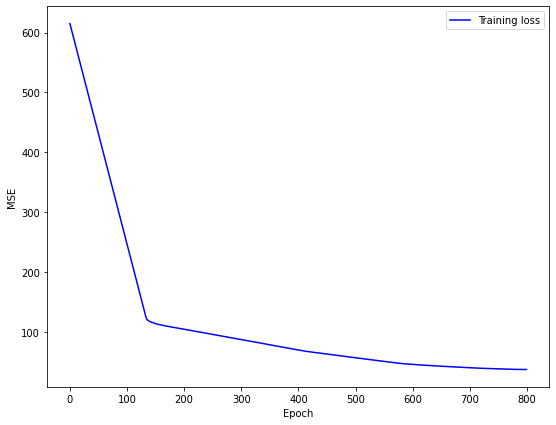

In [25]:
mse = history.history['loss']
val_loss = history.history.get('val_loss')

epochs = range(len(mse))

plt.figure(figsize=(9, 7))
plt.plot(epochs, mse, 'r', label='Training loss', color='blue')
if val_loss is not None:
    plt.plot(epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [26]:
# Preparing input for the model 
x = xtest[X.columns].values.astype('float32')
x = np.reshape(x, (1, X.shape[1]))

# Predicting 
model.predict(x)

array([[1016.6954]], dtype=float32)

In [27]:
# Extracting model weights
w = [x[0] for x in model.weights[0].numpy()]

In [28]:
dcoef = pd.DataFrame({'feature': X.columns, 'w': w})
dcoef.sort_values('w', inplace=True)

In [29]:
dcoef

,feature,w
23,is_cured-90-99Vyras,-0.376079
27,is_death-10-19Vyras,-0.215696
7,is_cured-120-129Moteris,-0.194766
26,is_death-10-19Moteris,-0.142451
101,is_quarantine,-0.123499
...,...,...
11,is_cured-30-39Vyras,0.667210
80,is_treated-30-39Vyras,0.679183
81,is_treated-40-49Moteris,0.691606
89,is_treated-80-89Moteris,0.692485
